In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #la fonction qu'on va utiliser pour pouvoir transformer nos valeurs catégorie en des valeurs numériquees
import folium
from folium import Choropleth,Circle,Marker

In [5]:
data= pd.read_csv('Murders.csv')

In [6]:
data.head()

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,384897,384898,SC02100,Florence,Sheriff,Florence,South Carolina,1998,January,1,...,Unknown,Male,33,White,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,580401,580402,AZ01003,Tucson,Municipal Police,Pima,Arizona,2011,November,1,...,Not Hispanic,Male,21,Native American/Alaska Native,Not Hispanic,Family,Shotgun,0,0,FBI
2,236203,236204,OHCLP00,Cleveland,Municipal Police,Cuyahoga,Ohio,1991,July,12,...,Unknown,Male,48,White,Unknown,Acquaintance,Knife,0,0,FBI
3,440437,440438,MA01301,Boston,Municipal Police,Suffolk,Massachusetts,2002,January,5,...,Unknown,Male,46,White,Unknown,Wife,Strangulation,0,0,FBI
4,276041,276042,IN04600,La Porte,Sheriff,La Porte,Indiana,1993,January,1,...,Unknown,Male,26,White,Unknown,Acquaintance,Shotgun,0,0,FBI


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             10000 non-null  int64 
 1   Record ID              10000 non-null  int64 
 2   Agency Code            10000 non-null  object
 3   Agency Name            10000 non-null  object
 4   Agency Type            10000 non-null  object
 5   City                   10000 non-null  object
 6   State                  10000 non-null  object
 7   Year                   10000 non-null  int64 
 8   Month                  10000 non-null  object
 9   Incident               10000 non-null  int64 
 10  Crime Type             10000 non-null  object
 11  Crime Solved           10000 non-null  object
 12  Victim Sex             10000 non-null  object
 13  Victim Age             10000 non-null  int64 
 14  Victim Race            10000 non-null  object
 15  Victim Ethnicity    

In [8]:
data.isnull().sum()

Unnamed: 0               0
Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [10]:
data.replace({'Unknown': np.nan})

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,384897,384898,SC02100,Florence,Sheriff,Florence,South Carolina,1998,January,1,...,NaN,Male,33,White,NaN,Acquaintance,Blunt Object,0,0,FBI
1,580401,580402,AZ01003,Tucson,Municipal Police,Pima,Arizona,2011,November,1,...,Not Hispanic,Male,21,Native American/Alaska Native,Not Hispanic,Family,Shotgun,0,0,FBI
2,236203,236204,OHCLP00,Cleveland,Municipal Police,Cuyahoga,Ohio,1991,July,12,...,NaN,Male,48,White,NaN,Acquaintance,Knife,0,0,FBI
3,440437,440438,MA01301,Boston,Municipal Police,Suffolk,Massachusetts,2002,January,5,...,NaN,Male,46,White,NaN,Wife,Strangulation,0,0,FBI
4,276041,276042,IN04600,La Porte,Sheriff,La Porte,Indiana,1993,January,1,...,NaN,Male,26,White,NaN,Acquaintance,Shotgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,251135,251136,ILCPD00,Chicago,Municipal Police,Cook,Illinois,1992,March,48,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
9996,360652,360653,ILCPD00,Chicago,Municipal Police,Cook,Illinois,1997,August,14,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
9997,80187,80188,PAPEP00,Philadelphia,Municipal Police,Philadelphia,Pennsylvania,1983,June,11,...,Not Hispanic,Female,39,Black,Not Hispanic,Husband,Knife,0,0,FBI
9998,273932,273933,FL05900,Seminole,Sheriff,Seminole,Florida,1993,February,1,...,NaN,Male,38,White,NaN,Wife,Handgun,0,0,FBI


In [18]:
data.dropna(inplace=True)

In [19]:
correlation = data.corr()
correlation

C:\Users\Ameni\AppData\Local\Temp\ipykernel_7356\3106392754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,Unnamed: 0,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
Unnamed: 0,1.000000,1.000000,0.997247,0.127992,0.023524,-0.030644,0.038449,0.064372
Record ID,1.000000,1.000000,0.997247,0.127992,0.023524,-0.030644,0.038449,0.064372
Year,0.997247,0.997247,1.000000,0.135370,0.025512,-0.028696,0.038766,0.065344
Incident,0.127992,0.127992,0.135370,1.000000,-0.008796,-0.010514,0.003992,0.007606
Victim Age,0.023524,0.023524,0.025512,-0.008796,1.000000,0.067236,-0.009183,-0.011100
Perpetrator Age,-0.030644,-0.030644,-0.028696,-0.010514,0.067236,1.000000,0.016868,0.007359
Victim Count,0.038449,0.038449,0.038766,0.003992,-0.009183,0.016868,1.000000,0.057516
Perpetrator Count,0.064372,0.064372,0.065344,0.007606,-0.011100,0.007359,0.057516,1.000000


In [21]:
data.columns

Index(['Unnamed: 0', 'Record ID', 'Agency Code', 'Agency Name', 'Agency Type',
       'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

In [31]:
le = LabelEncoder()
data1 = data.apply(lambda col: le.fit_transform(col.astype(str)))

In [32]:
data1

,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Victim Count,Perpetrator Count
0,300,40,18,4,0,1,1,27,4,2,1,24,4,0,0,0
1,673,2,31,9,0,1,1,10,2,1,1,12,2,11,0,0
2,225,35,11,5,22,1,1,26,4,2,1,39,4,0,0,0
3,841,21,22,4,190,1,0,40,4,2,1,37,4,27,0,0
4,463,14,13,4,0,1,1,18,4,2,1,17,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200,13,12,7,183,1,1,16,1,2,2,0,3,26,0,0
9996,200,13,17,1,42,1,1,25,1,2,2,0,3,26,0,0
9997,668,38,3,6,12,1,1,69,1,1,0,30,1,15,0,0
9998,786,9,13,3,0,1,0,33,4,2,1,29,4,27,0,0


In [34]:
correlation = data1.corr()
correlation

,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Victim Count,Perpetrator Count
City,1.000000,0.014157,-0.010838,-0.005137,-0.015589,0.007507,-0.002807,0.001825,0.034106,-0.035678,-0.019426,0.003125,0.016968,-0.019018,0.007264,0.024455
State,0.014157,1.000000,-0.009510,-0.001167,-0.099136,-0.002488,-0.032049,0.015106,-0.015343,0.118512,-0.092052,0.082101,-0.023186,-0.129560,0.027549,0.022586
Year,-0.010838,-0.009510,1.000000,0.013218,0.011880,-0.028845,0.025315,-0.003383,-0.046304,0.143406,0.043429,-0.019711,-0.006409,0.135212,0.039842,0.061381
Month,-0.005137,-0.001167,0.013218,1.000000,-0.016187,0.001964,0.016341,0.016256,0.005069,-0.018818,0.016142,0.002771,0.005250,0.010677,-0.010155,-0.015443
Incident,-0.015589,-0.099136,0.011880,-0.016187,1.000000,-0.022748,0.070797,-0.056938,-0.146529,0.006741,0.114814,-0.128040,-0.100768,0.130929,-0.015264,0.021419
Crime Type,0.007507,-0.002488,-0.028845,0.001964,-0.022748,1.000000,-0.000039,0.025504,-0.053421,-0.010625,0.077179,-0.014877,-0.045927,0.046005,0.005287,0.008380
Victim Sex,-0.002807,-0.032049,0.025315,0.016341,0.070797,-0.000039,1.000000,-0.087548,-0.114418,-0.058052,0.060746,-0.177053,-0.066133,-0.019740,-0.079285,0.075544
Victim Age,0.001825,0.015106,-0.003383,0.016256,-0.056938,0.025504,-0.087548,1.000000,0.126456,0.058960,-0.012124,0.207345,0.061964,0.029334,0.015359,-0.020000
Victim Race,0.034106,-0.015343,-0.046304,0.005069,-0.146529,-0.053421,-0.114418,0.126456,1.000000,-0.253892,-0.039419,0.116274,0.597477,0.027197,0.050456,-0.006593
Victim Ethnicity,-0.035678,0.118512,0.143406,-0.018818,0.006741,-0.010625,-0.058052,0.058960,-0.253892,1.000000,-0.013092,0.005522,-0.162410,-0.001451,0.033121,0.023159


<Axes: >

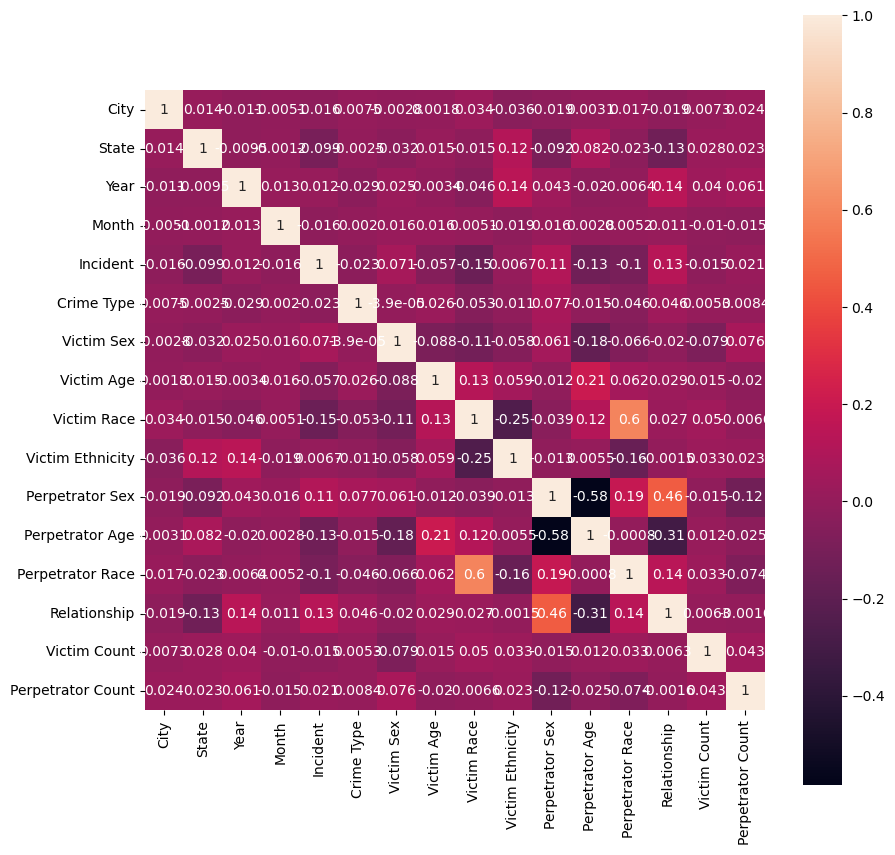

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation , square=True, annot=True)

<Axes: >

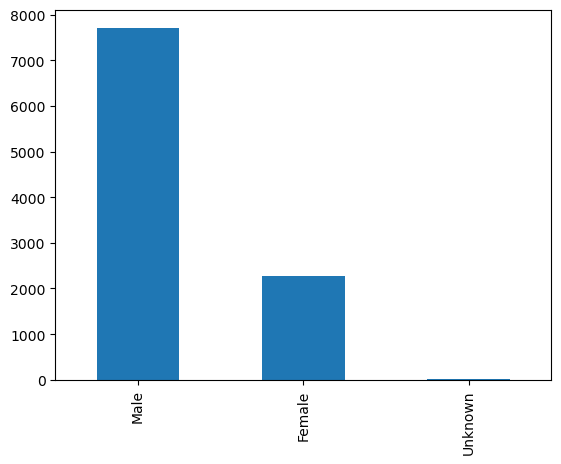

In [43]:
data['Victim Sex'].value_counts().plot.bar()

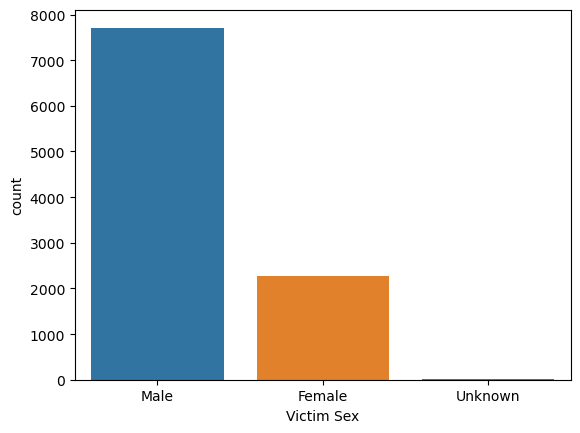

In [46]:
sns.countplot(x='Victim Sex', data=data)
plt.show()

In [52]:
sex = data['Victim Sex'].value_counts()
fig = px.bar(y= sex , x = sex.index , title='Victim Sex')
fig.show()

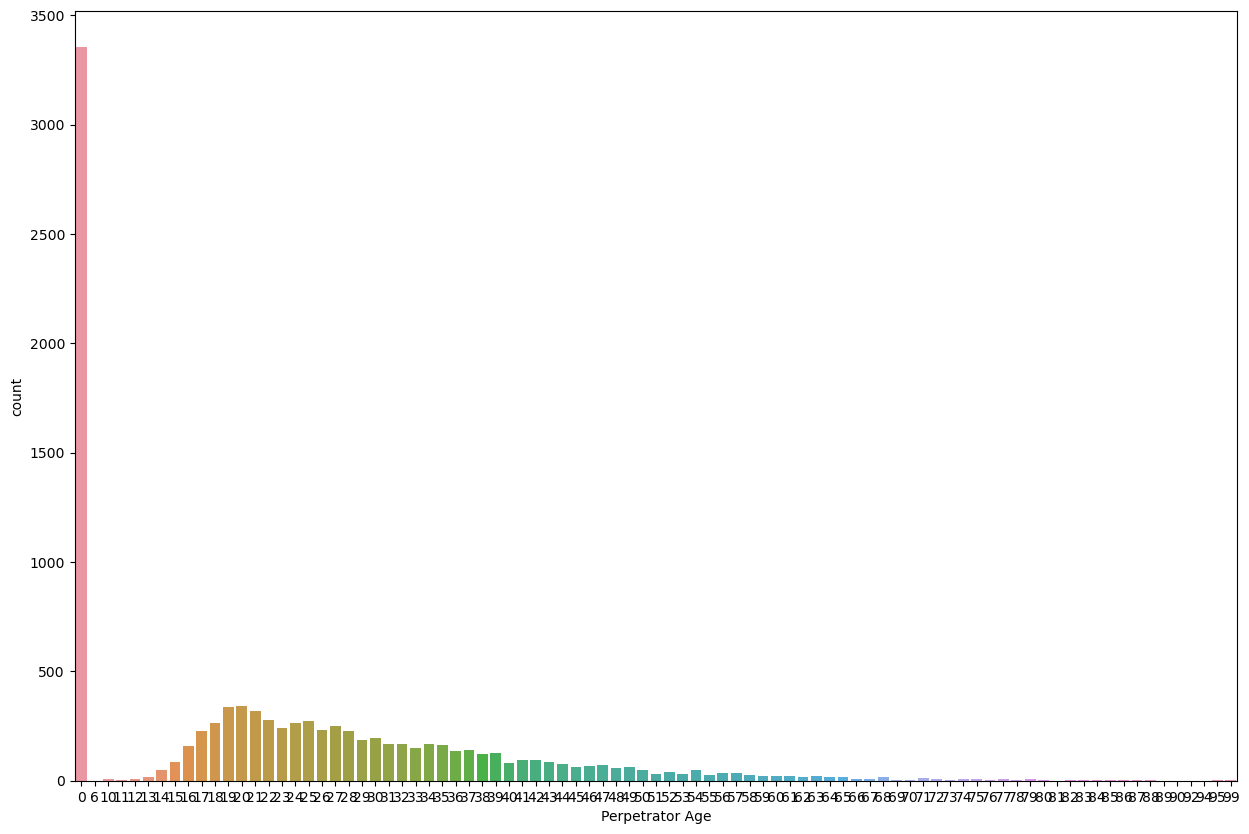

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(x ='Perpetrator Age', data=data )
plt.show()

C:\Users\Ameni\AppData\Local\Temp\ipykernel_7356\1244730563.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Perpetrator Age', ylabel='Density'>

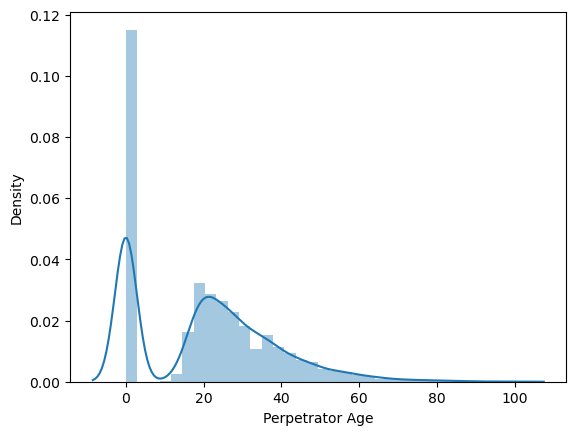

In [56]:
sns.distplot(data['Perpetrator Age'])

In [57]:
crime = pd.read_csv('CrimeChicago.csv')

In [58]:
crime.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,61410,I182005190,3115,Investigate Person,INVESTIGATE PERSON,B3,465,NaN,2018-01-20 11:05:00,2018,1,Saturday,11,Part Three,JOHNSTON RD,42.287505,-71.092121,"(42.28750526, -71.09212143)"
1,230693,I162038129,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,288,NaN,2016-05-16 11:24:00,2016,5,Monday,11,Part Two,MALCOLM X BLVD,42.329551,-71.085980,"(42.32955100, -71.08598000)"
2,191265,I162080532,3301,Verbal Disputes,VERBAL DISPUTE,A7,30,NaN,2016-10-02 00:07:00,2016,10,Sunday,0,Part Three,MAVERICK ST,42.369130,-71.036595,"(42.36912985, -71.03659529)"
3,205643,I162064987,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,NaN,,NaN,2016-08-12 17:46:00,2016,8,Friday,17,Part Two,NaN,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
4,185376,I162086815,3410,Towed,TOWED MOTOR VEHICLE,B3,456,NaN,2016-10-23 09:24:00,2016,10,Sunday,9,Part Three,GREENWOOD ST,42.301759,-71.079552,"(42.30175909, -71.07955160)"


In [59]:
crime.isnull().sum()

Unnamed: 0                0
INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                 62
REPORTING_AREA            0
SHOOTING               9974
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                  3
STREET                  374
Lat                     640
Long                    640
Location                  0
dtype: int64

In [60]:
crime.dropna(inplace=True)

In [61]:
crime.isnull().sum()

Unnamed: 0             0
INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [62]:
voler = crime[((crime.OFFENSE_CODE_GROUP=='Robbery'))]

In [63]:
voler

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
2293,172905,I162100193,301,Robbery,ROBBERY - STREET,B2,308,Y,2016-12-08 17:06:00,2016,12,Thursday,17,Part One,BOWER ST,42.319968,-71.08715,"(42.31996758, -71.08715022)"


In [68]:
m=folium.Map(location=[42.32,-71.0589],zoom_start=13)
m